In [4]:
# pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

In [10]:
import requests
import pandas as pd
from io import StringIO

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"

response = requests.get(URL)

if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data)
    
    print(df.head(5))

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      

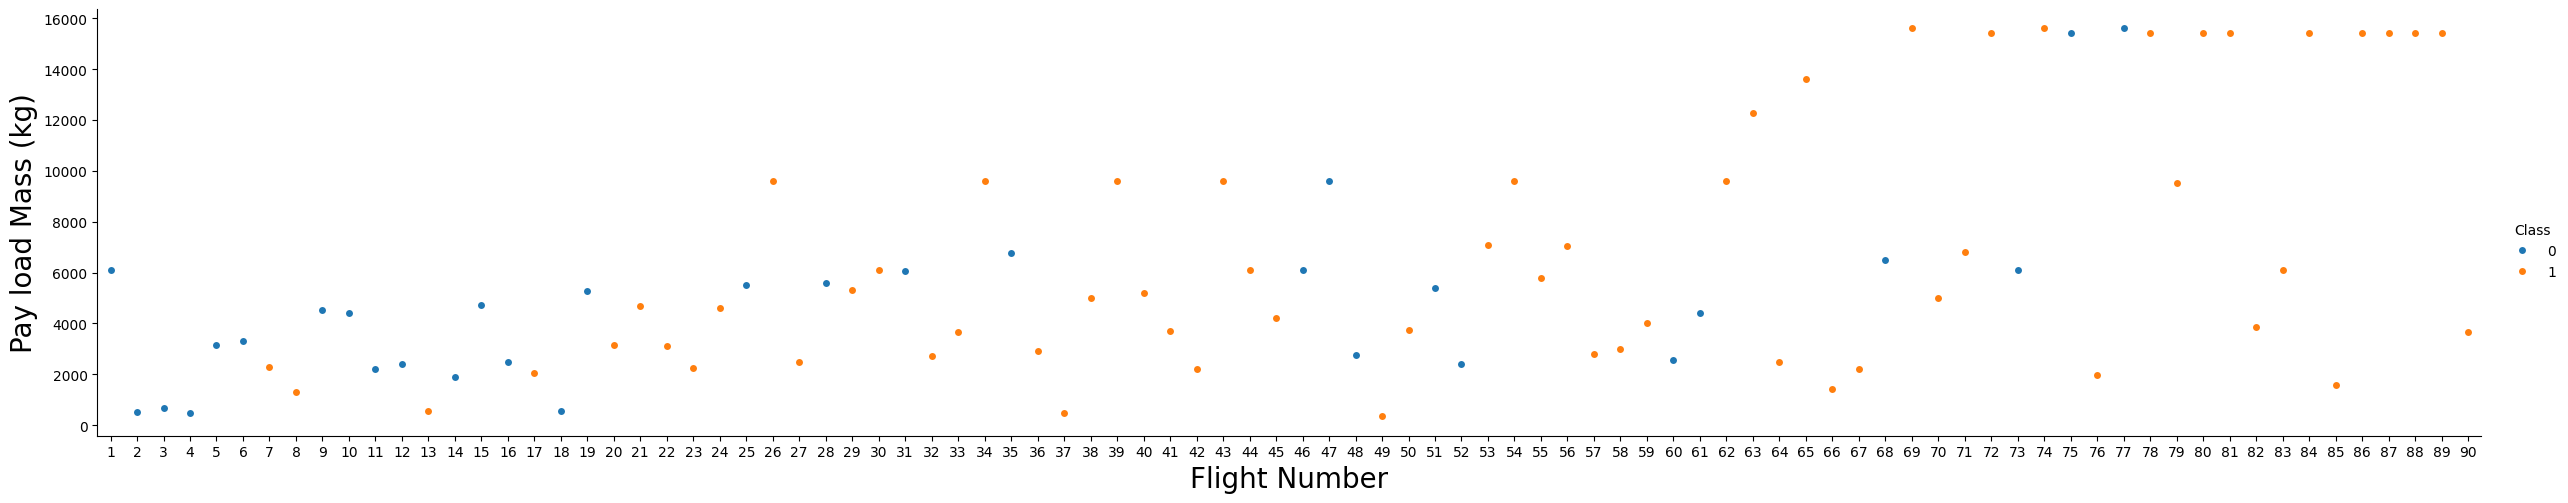

In [11]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

##### TASK 1: Visualize the relationship between Flight Number and Launch Site
Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'

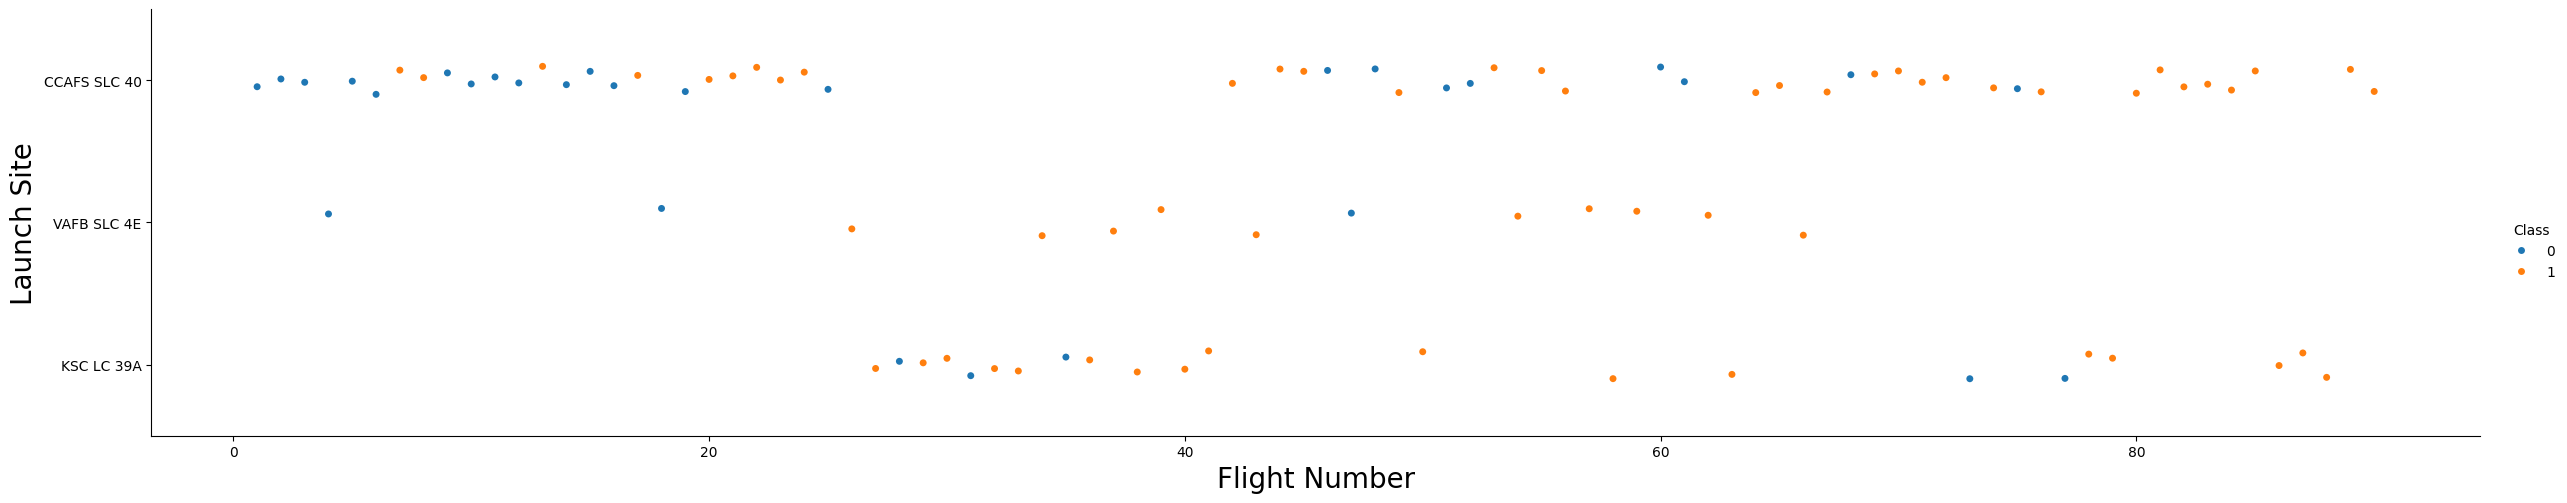

In [12]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, kind="strip", aspect=5)

plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)

plt.show()

##### TASK 2: Visualize the relationship between Payload Mass and Launch Site
We also want to observe if there is any relationship between launch sites and their payload mass.

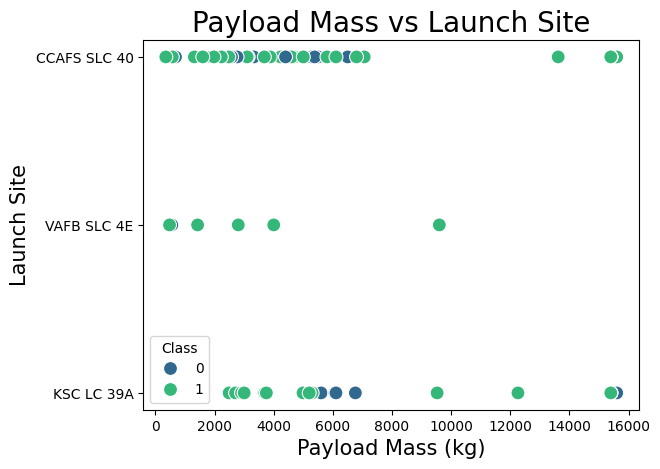

In [15]:
sns.scatterplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, s=100, palette="viridis")

plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Launch Site", fontsize=15)
plt.title("Payload Mass vs Launch Site", fontsize=20)

plt.show()

##### TASK 3: Visualize the relationship between success rate of each orbit type
Next, we want to visually check if there are any relationship between success rate and orbit type.

C:\Users\kimey\AppData\Local\Temp\ipykernel_29092\3514251082.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Orbit", y="Success Rate", data=orbit_success_rate, palette="viridis")


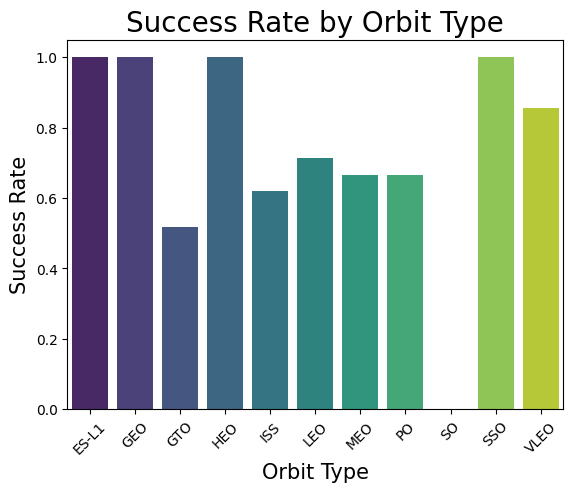

In [16]:
orbit_success_rate = df.groupby("Orbit")["Class"].mean().reset_index()

orbit_success_rate.columns = ["Orbit", "Success Rate"]

sns.barplot(x="Orbit", y="Success Rate", data=orbit_success_rate, palette="viridis")

plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.title("Success Rate by Orbit Type", fontsize=20)

plt.xticks(rotation=45)
plt.show()

##### TASK 4: Visualize the relationship between FlightNumber and Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

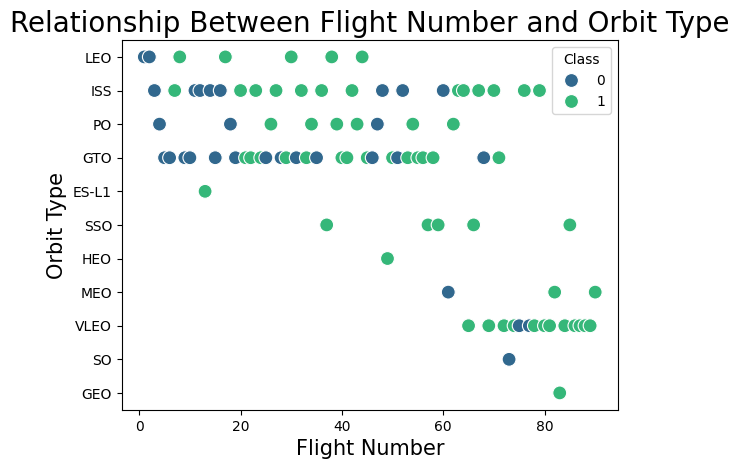

In [17]:
sns.scatterplot(x="FlightNumber", y="Orbit", hue="Class", data=df, palette="viridis", s=100)

plt.xlabel("Flight Number", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship Between Flight Number and Orbit Type", fontsize=20)

plt.legend(title="Class")
plt.show()

##### TASK 5: Visualize the relationship between Payload Mass and Orbit type
Similarly, we can plot the Payload Mass vs. Orbit scatter point charts to reveal the relationship between Payload Mass and Orbit type

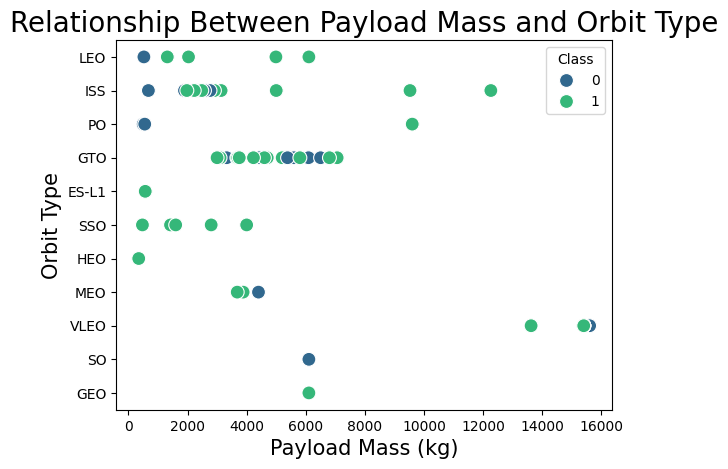

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x="PayloadMass", y="Orbit", hue="Class", data=df, palette="viridis", s=100)

plt.xlabel("Payload Mass (kg)", fontsize=15)
plt.ylabel("Orbit Type", fontsize=15)
plt.title("Relationship Between Payload Mass and Orbit Type", fontsize=20)

plt.legend(title="Class")
plt.show()

##### TASK 6: Visualize the launch success yearly trend
You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.

The function will help you get the year from the date:

In [19]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


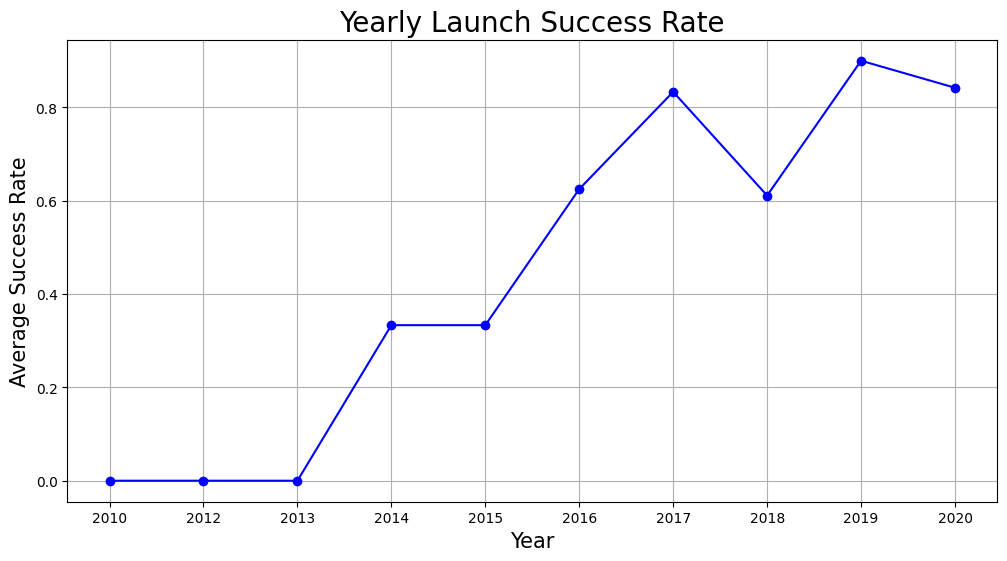

In [20]:
def Extract_year():
    year = [i.split("-")[0] for i in df["Date"]]
    return year

df['Year'] = Extract_year()

df['Success'] = df['Class']

yearly_success_rate = df.groupby('Year')['Success'].mean()

plt.figure(figsize=(12, 6))
plt.plot(yearly_success_rate.index, yearly_success_rate.values, marker='o', linestyle='-', color='b')

plt.xlabel('Year', fontsize=15)
plt.ylabel('Average Success Rate', fontsize=15)
plt.title('Yearly Launch Success Rate', fontsize=20)
plt.grid(True)

plt.show()

##### Features Engineering

In [21]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


##### TASK 7: Create dummy variables to categorical columns
Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [23]:
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
df_dummies = pd.get_dummies(df, columns=categorical_columns)

print(df_dummies.head())

   FlightNumber  Date BoosterVersion  PayloadMass      Outcome  Flights  \
0             1  2010       Falcon 9  6104.959412    None None        1   
1             2  2012       Falcon 9   525.000000    None None        1   
2             3  2013       Falcon 9   677.000000    None None        1   
3             4  2013       Falcon 9   500.000000  False Ocean        1   
4             5  2013       Falcon 9  3170.000000    None None        1   

   GridFins  Reused   Legs  Block  ...  Serial_B1048  Serial_B1049  \
0     False   False  False    1.0  ...         False         False   
1     False   False  False    1.0  ...         False         False   
2     False   False  False    1.0  ...         False         False   
3     False   False  False    1.0  ...         False         False   
4     False   False  False    1.0  ...         False         False   

   Serial_B1050  Serial_B1051 Serial_B1054  Serial_B1056  Serial_B1058  \
0         False         False        False         Fal

##### TASK 8: Cast all numeric columns to float64
Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64

In [26]:
categorical_columns = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']
df_dummies = pd.get_dummies(df, columns=categorical_columns)

string_columns = df_dummies.select_dtypes(include=['object']).columns
print(f"String columns: {string_columns}")


String columns: Index(['Date', 'BoosterVersion', 'Outcome', 'Year'], dtype='object')


In [27]:
df_dummies = df_dummies.drop(columns=string_columns)

In [28]:
df_dummies = df_dummies.astype('float64')

print(df_dummies.dtypes)

FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 84, dtype: object
